# <span style='color:midnightblue'>  Import libraries  </span>

In [62]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# <span style='color:midnightblue'>  Load dataset  </span>

In [63]:
df = pd.read_csv("fiktivt_datasett_overgang_til_arbeid[1][1][2][1][3].csv")

### <span style='color:midnightblue'>  Translation of columns' names  </span>
**jobb_etter_6mnd (Target variable)** - job after 6 months <br>
**utdanning** - education <br>
**sykdom_siste_aar** - any disease in the last year <br>
**arbsoker_siste_aar** - job-seeker in the last year <br>
**forerkort** - driver's license <br>
**arbeid_siste_2mnd** - worked in the last two months <br>
**alder** - age <br>
**fylke** - county of residence <br>
**yrke** - profession <br>
**kjonn** - gender

In [64]:
df.head()

,ID,jobb_etter_6mnd,utdanning,sykdom_siste_aar,arbsoker_siste_aar,forerkort,arbeid_siste_2mnd,alder,fylke,yrke,kjonn
0,15,Nei,Høyere utd 4 år+,Nei,Ja,Ja,Nei,35,Vestfold,Annet,Mann
1,32,Nei,Grunnskole,Nei,Nei,Nei,Nei,30,Vestfold,Annet,Mann
2,34,Nei,Grunnskole,Nei,Nei,Nei,Nei,29,Vestfold,Høgskoleyrker,Kvinne
3,35,Nei,VGS ikke fullf,Nei,Ja,Ja,Nei,36,Vestfold,Høgskoleyrker,Mann
4,40,Nei,Høyere utd u4 år,Ja,Nei,Ja,Nei,40,Vestfold,Maskin og transportarbeidere,Mann


#### <span style='color:black'>  The dataset has 10 features and 8822 samples  </span>

In [65]:
df.shape

(8822, 11)

### <span style='color:midnightblue'> Removing ID column since it does not provide any information   </span>

In [66]:
df=df.drop('ID', axis = 1) # axis 1 means column

### <span style='color:midnightblue'> Observing the trend for NaN values in the dataset  </span>

In [67]:
nan_values = df[df.isna().any(axis=1)]
nan_values

,jobb_etter_6mnd,utdanning,sykdom_siste_aar,arbsoker_siste_aar,forerkort,arbeid_siste_2mnd,alder,fylke,yrke,kjonn
6,Nei,NaN,Ja,Ja,Nei,Nei,39,Vestfold,"Salg, service og omsorg",Mann
13,Nei,NaN,Ja,Ja,Nei,Nei,48,Vestfold,Akademiske yrker,Kvinne
33,Nei,NaN,Ja,Ja,Nei,Nei,41,Vestfold,"Salg, service og omsorg",Mann
42,Nei,NaN,Ja,Nei,Nei,Nei,42,Vestfold,Høgskoleyrker,Mann
43,Nei,NaN,Nei,Ja,Ja,Nei,35,Vestfold,"Salg, service og omsorg",Kvinne
...,...,...,...,...,...,...,...,...,...,...
8786,Ja,NaN,Nei,Nei,Nei,Ja,33,Akershus,Renholdere og hjelpepleiere,Mann
8798,Nei,NaN,Ja,Ja,Ja,Nei,40,Ukjent,"Bønder, fiskere, mv",Kvinne
8816,Nei,NaN,Nei,Ja,Nei,Nei,50,Ukjent,Akademiske yrker,Mann
8817,Ja,NaN,Nei,Nei,Ja,Ja,31,Ukjent,Maskin og transportarbeidere,Mann


### <span style='color:midnightblue'> Shift target variable column to the end of the dataframe  </span>

In [68]:
temp_cols=df.columns.tolist()
new_cols=temp_cols[1:] + temp_cols[0:1]
df=df[new_cols]
df.head()

,utdanning,sykdom_siste_aar,arbsoker_siste_aar,forerkort,arbeid_siste_2mnd,alder,fylke,yrke,kjonn,jobb_etter_6mnd
0,Høyere utd 4 år+,Nei,Ja,Ja,Nei,35,Vestfold,Annet,Mann,Nei
1,Grunnskole,Nei,Nei,Nei,Nei,30,Vestfold,Annet,Mann,Nei
2,Grunnskole,Nei,Nei,Nei,Nei,29,Vestfold,Høgskoleyrker,Kvinne,Nei
3,VGS ikke fullf,Nei,Ja,Ja,Nei,36,Vestfold,Høgskoleyrker,Mann,Nei
4,Høyere utd u4 år,Ja,Nei,Ja,Nei,40,Vestfold,Maskin og transportarbeidere,Mann,Nei


### <span style='color:midnightblue'> Delete rows containing NaN values  </span>

In [69]:
df.dropna(subset = ["utdanning"], inplace=True)
df

,utdanning,sykdom_siste_aar,arbsoker_siste_aar,forerkort,arbeid_siste_2mnd,alder,fylke,yrke,kjonn,jobb_etter_6mnd
0,Høyere utd 4 år+,Nei,Ja,Ja,Nei,35,Vestfold,Annet,Mann,Nei
1,Grunnskole,Nei,Nei,Nei,Nei,30,Vestfold,Annet,Mann,Nei
2,Grunnskole,Nei,Nei,Nei,Nei,29,Vestfold,Høgskoleyrker,Kvinne,Nei
3,VGS ikke fullf,Nei,Ja,Ja,Nei,36,Vestfold,Høgskoleyrker,Mann,Nei
4,Høyere utd u4 år,Ja,Nei,Ja,Nei,40,Vestfold,Maskin og transportarbeidere,Mann,Nei
...,...,...,...,...,...,...,...,...,...,...
8814,Grunnskole,Ja,Nei,Nei,Nei,33,Ukjent,Maskin og transportarbeidere,Kvinne,Nei
8815,Høyere utd 4 år+,Nei,Ja,Ja,Ja,31,Ukjent,Håndverkere,Kvinne,Ja
8819,Høyere utd u4 år,Nei,Nei,Nei,Nei,48,Ukjent,"Salg, service og omsorg",Kvinne,Nei
8820,Grunnskole,Nei,Nei,Nei,Nei,34,Ukjent,Maskin og transportarbeidere,Mann,Nei


In [70]:
df['utdanning'].unique()

array(['Høyere utd 4 år+', 'Grunnskole', 'VGS ikke fullf',
       'Høyere utd u4 år', 'VGS fullf'], dtype=object)

In [71]:
df['fylke'].unique()

array(['Vestfold', 'Vest-Agder', 'Ukjent', 'Troms', 'Telemark',
       'Sør-Trøndelag', 'Sogn og Fjordane', 'Rogaland', 'Østfold', 'Oslo',
       'Oppland', 'Nordland', 'Nord-Trøndelag', 'Møre og Romsdal',
       'Hordaland', 'Hedmark', 'Finnmark', 'Buskerud', 'Aust-Agder',
       'Akershus'], dtype=object)

### <span style='color:midnightblue'> Calculate the number of 'Ukjent' values in 'fylke' column </span>

In [72]:
indexNames = df[ df['fylke'] == 'Ukjent' ].index
indexNames

Int64Index([ 756,  757,  758,  759,  760,  761,  762,  763,  764,  767,
            ...
            8809, 8810, 8811, 8812, 8813, 8814, 8815, 8819, 8820, 8821],
           dtype='int64', length=165)

### <span style='color:midnightblue'> Delete rows containing 'Ukjent' </span>

In [73]:
df.drop(indexNames , inplace=True)
df

,utdanning,sykdom_siste_aar,arbsoker_siste_aar,forerkort,arbeid_siste_2mnd,alder,fylke,yrke,kjonn,jobb_etter_6mnd
0,Høyere utd 4 år+,Nei,Ja,Ja,Nei,35,Vestfold,Annet,Mann,Nei
1,Grunnskole,Nei,Nei,Nei,Nei,30,Vestfold,Annet,Mann,Nei
2,Grunnskole,Nei,Nei,Nei,Nei,29,Vestfold,Høgskoleyrker,Kvinne,Nei
3,VGS ikke fullf,Nei,Ja,Ja,Nei,36,Vestfold,Høgskoleyrker,Mann,Nei
4,Høyere utd u4 år,Ja,Nei,Ja,Nei,40,Vestfold,Maskin og transportarbeidere,Mann,Nei
...,...,...,...,...,...,...,...,...,...,...
8790,VGS fullf,Nei,Ja,Nei,Ja,31,Akershus,Maskin og transportarbeidere,Kvinne,Nei
8791,Høyere utd u4 år,Nei,Nei,Ja,Nei,37,Akershus,Akademiske yrker,Mann,Ja
8792,VGS fullf,Nei,Nei,Ja,Ja,38,Akershus,Akademiske yrker,Kvinne,Ja
8793,VGS ikke fullf,Nei,Nei,Nei,Ja,40,Akershus,Akademiske yrker,Kvinne,Nei


### <span style='color:midnightblue'> Standardize 'kjønn' feature to contain only two values, *'Female'* or *'Male'* </span>

In [74]:
df['kjonn'] = df['kjonn'].replace(['F','M'],['Kvinne','Mann'])
df['kjonn'] = df['kjonn'].replace(['Kvinne','Mann'],['Female','Male'])
df['kjonn'].unique()

array(['Male', 'Female'], dtype=object)

### <span style='color:midnightblue'> Feature distribution: Age </span>

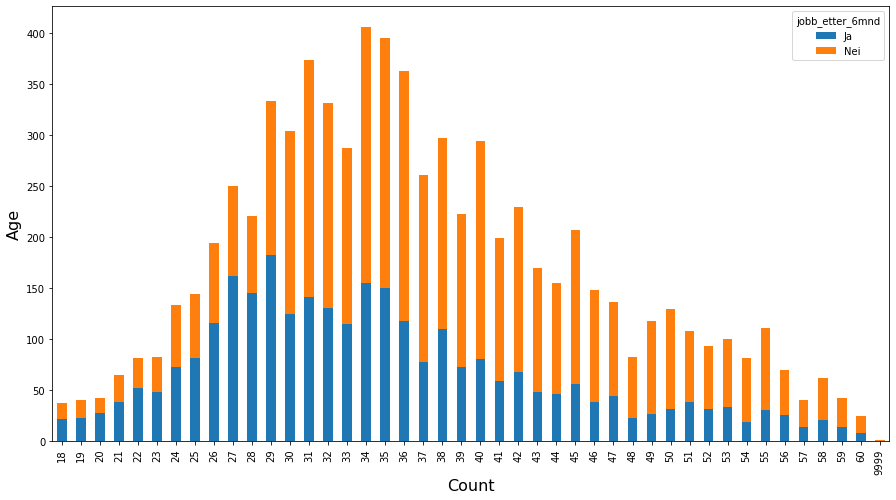

In [75]:
pd.crosstab(df.alder,df.jobb_etter_6mnd).plot(kind='bar', stacked = True, figsize=(15, 8))
plt.xlabel('Count', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.show()

In [76]:
df['alder'].unique()

array([  35,   30,   29,   36,   40,   34,   55,   32,   49,   54,   18,
         51,   57,   37,   39,   38,   42,   41,   25,   26,   47,   43,
         33,   53,   24,   28,   31,   44,   20,   48,   27,   52,   45,
         21,   59,   50,   22,   19,   56,   46,   58,   60,   23, 9999],
      dtype=int64)

#### <span style='color:midnightblue'> Store index numbers of the rows containing df['alder'] == 9999 </span>

In [77]:
x = df[df['alder'] == 9999].index
df.shape

(7475, 10)

#### <span style='color:midnightblue'> Delete row/s containing value of 9999 in the 'alder' column</span>

In [78]:
df.drop(x , inplace=True)
df['alder'].unique()
df.shape

(7474, 10)

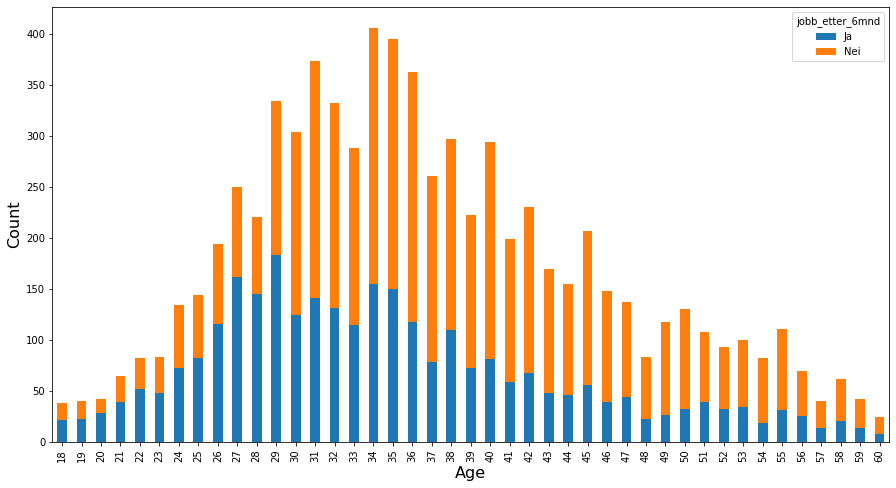

In [79]:
pd.crosstab(df.alder,df.jobb_etter_6mnd).plot(kind='bar', stacked = True, figsize=(15, 8))
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

## <span style='color:midnightblue'> Target variable distribution </span>

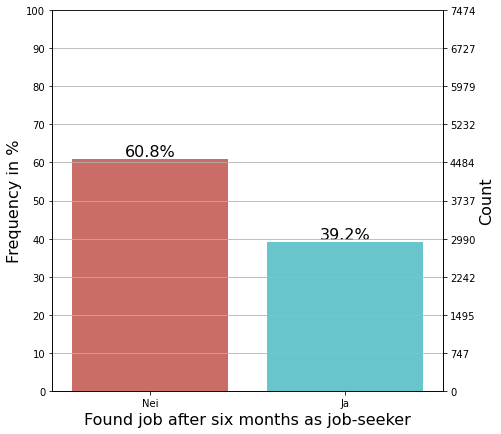

In [80]:
import matplotlib.ticker as ticker

ncount = len(df)
plt.figure(figsize=(7,7))
ax = sns.countplot(x=df['jobb_etter_6mnd'], palette='hls')

# Make twin axis
ax2 = ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency in %', fontsize=16)
ax.set_ylabel('Count', fontsize=16)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', fontsize=16) # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

ax.set_xlabel('Found job after six months as job-seeker', fontsize=16)
plt.show()

## <span style='color:midnightblue'> Feature distribution: Gender </span>

<Figure size 432x288 with 0 Axes>

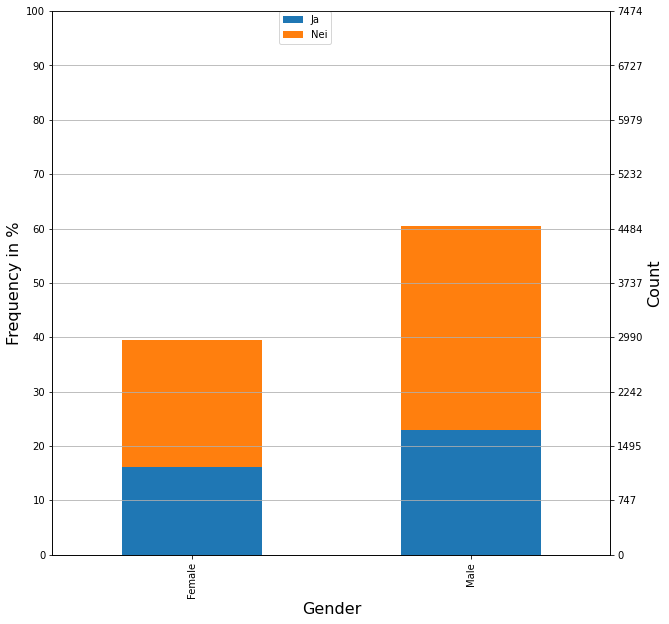

In [81]:
import matplotlib.ticker as ticker

ncount = len(df)
plt.figure()
ax = pd.crosstab(df.kjonn,df.jobb_etter_6mnd).plot(kind='bar', stacked = True, figsize=(10,10))
# ax = sns.countplot(x=df['kjonn'], palette='hls')

# Make twin axis
ax2 = ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency in %', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
'''
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', fontsize=16) # set the alignment of the text
'''
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

ax.set_xlabel('Gender', fontsize=16)
ax.legend(bbox_to_anchor=(0.5, 1), loc='upper right', borderaxespad=0.)
plt.show()

### <span style='color:midnightblue'> Feature distribution: Profession </span>

Text(0, 0.5, 'Profession')

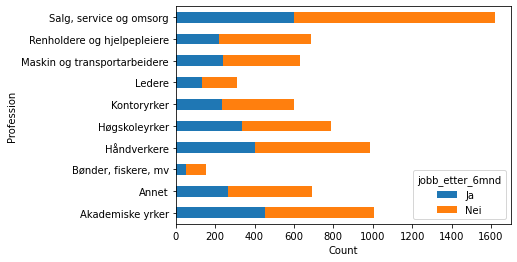

In [82]:
%matplotlib inline
pd.crosstab(df.yrke,df.jobb_etter_6mnd).plot(kind='barh', stacked = True)
plt.xlabel('Count')
plt.ylabel('Profession')

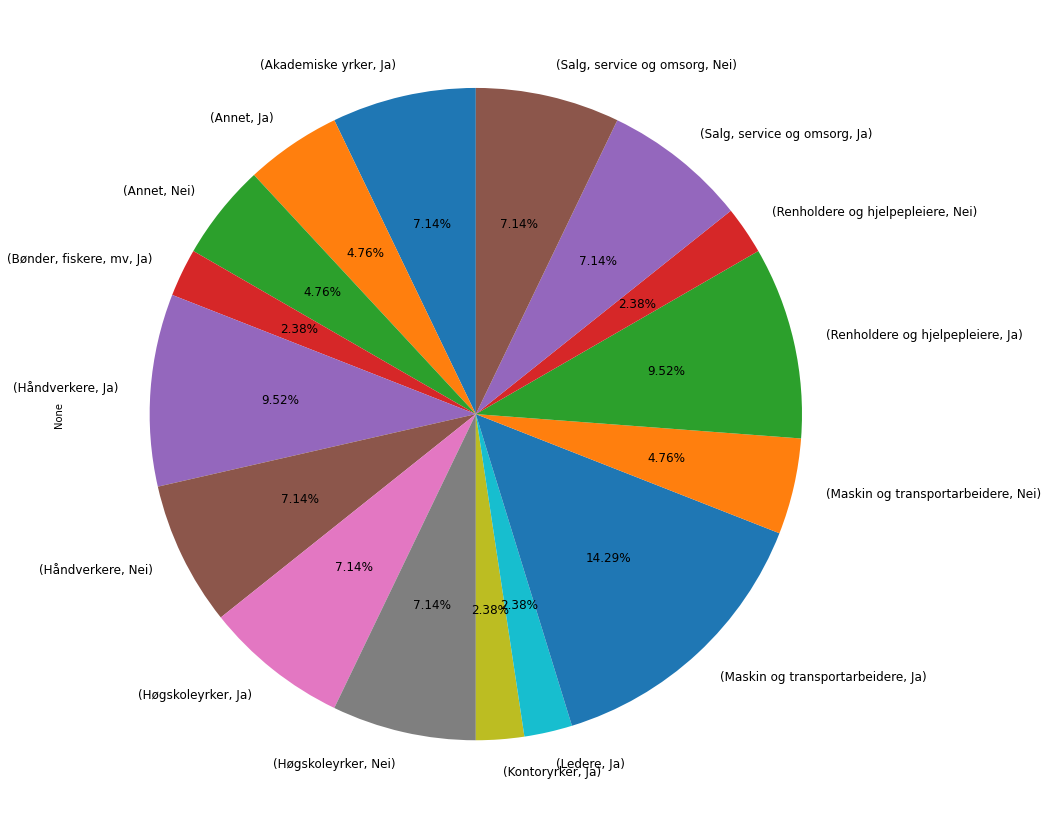

In [22]:
plt.figure(figsize=(15,15))
x = df.loc[
    (df.alder == 20), 
    ['yrke', 'jobb_etter_6mnd'],
]
x.groupby(['yrke', 'jobb_etter_6mnd']).size().plot(kind='pie', autopct='%.2f%%', fontsize = 12, startangle=90)

### <span style='color:midnightblue'> Feature distribution: Education </span>

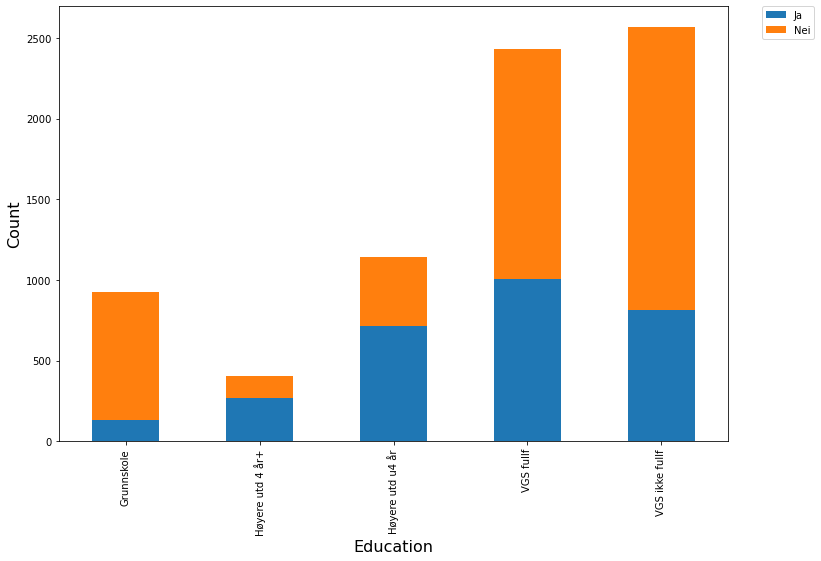

In [23]:
pd.crosstab(df.utdanning,df.jobb_etter_6mnd).plot(kind='bar',  stacked = True, figsize = (12, 8))
plt.xlabel('Education', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


Text(0, 0.5, '')

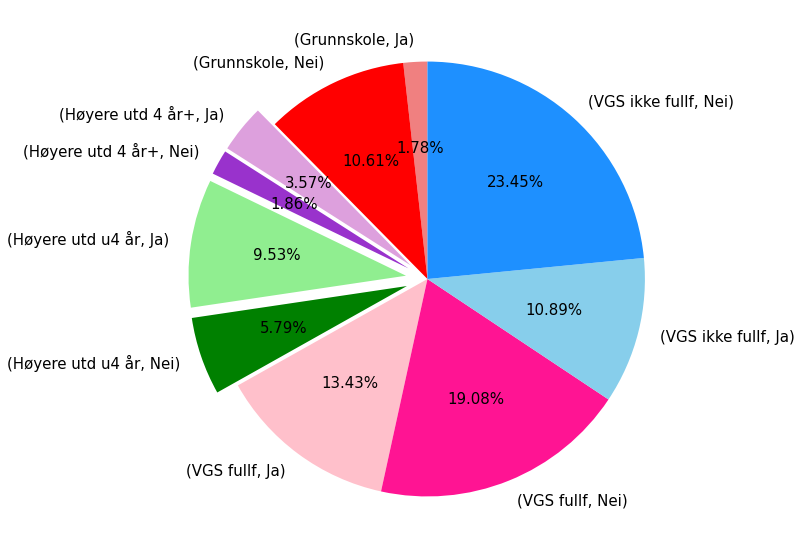

In [24]:
plt.figure(figsize=(10,10))
explode = (0, 0, 0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0) 
df.groupby(['utdanning', 'jobb_etter_6mnd']).size().plot(kind='pie', explode = explode, autopct='%.2f%%', fontsize = 15, startangle=90, colors=['lightcoral', 'red', 'plum', 'darkorchid', 'lightgreen', 'green', 'pink', 'deeppink' , 'skyblue','dodgerblue'])
plt.ylabel("")

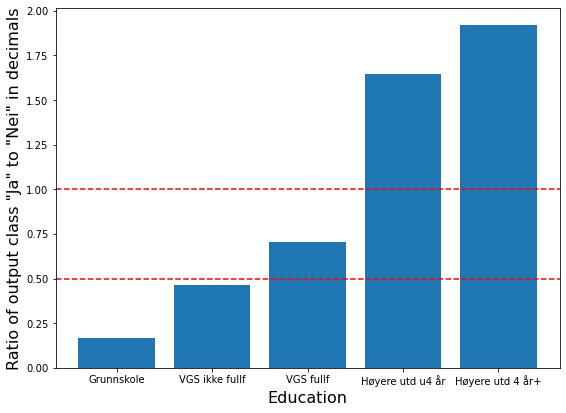

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0, 0, 1, 1])
langs = ['Grunnskole', 'VGS ikke fullf', 'VGS fullf', 'Høyere utd u4 år', 'Høyere utd 4 år+']
students = [0.1677, 0.4642, 0.7038, 1.6459, 1.9193]
ax.bar(langs,students)
ax.set_xlabel('Education', fontsize=16)
ax.set_ylabel('Ratio of output class "Ja" to "Nei" in decimals', fontsize=16)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

### <span style='color:midnightblue'> Feature distribution: Driver's License </span>

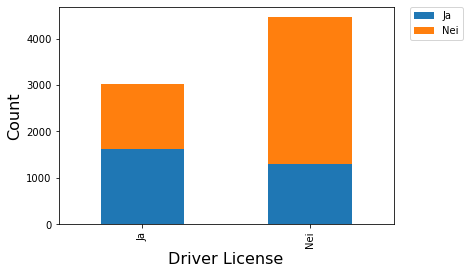

In [26]:
table=pd.crosstab(df.forerkort,df.jobb_etter_6mnd).plot(kind='bar',  stacked = True )
plt.xlabel('Driver License', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### <span style='color:midnightblue'> Feature distribution: County of residence </span>

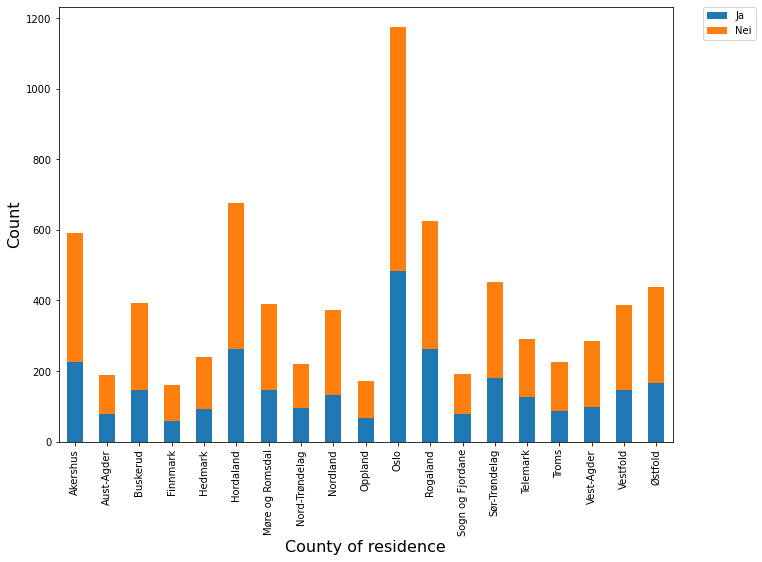

In [27]:
pd.crosstab(df.fylke,df.jobb_etter_6mnd).plot(kind='bar',  stacked = True, figsize=(11, 8))
plt.xlabel('County of residence', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Text(0, 0.5, '')

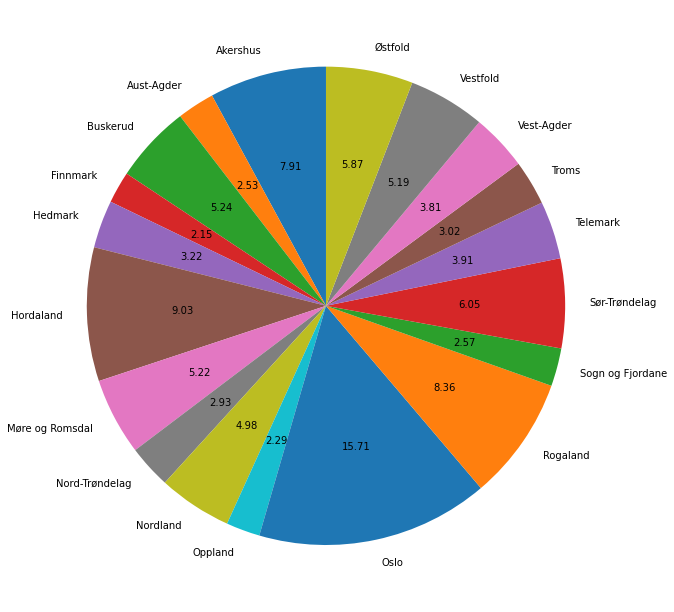

In [28]:
plt.figure(figsize=(11,11))
df.groupby('fylke').size().plot(kind='pie', autopct='%.2f', startangle = 90)
plt.ylabel("")

### <span style='color:midnightblue'> Distribution of education within each profession </span>

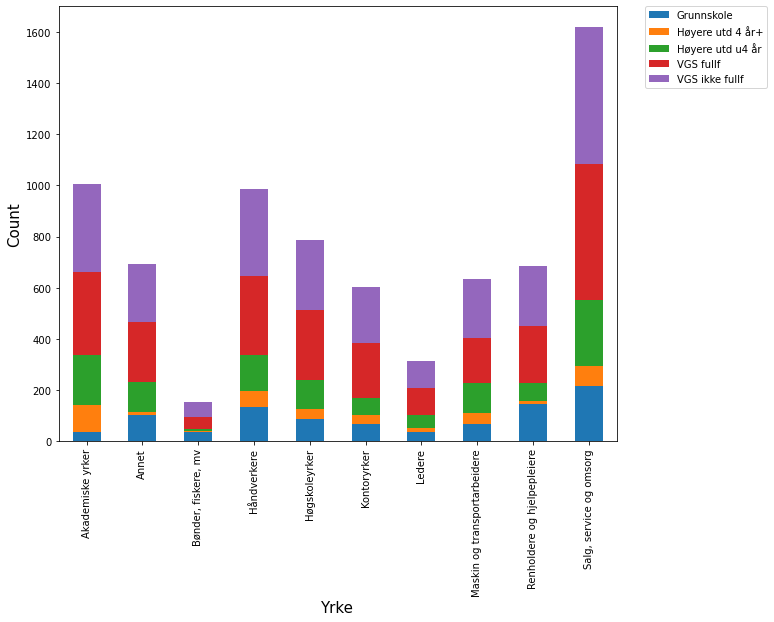

In [29]:
pd.crosstab(df.yrke, df.utdanning).plot(kind='bar', stacked=True, figsize = (10, 8))
plt.xlabel('Yrke', fontsize = 15)
plt.ylabel('Count', fontsize= 15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### <span style='color:midnightblue'> Feature Distribution: Sickness in the last one year </span>

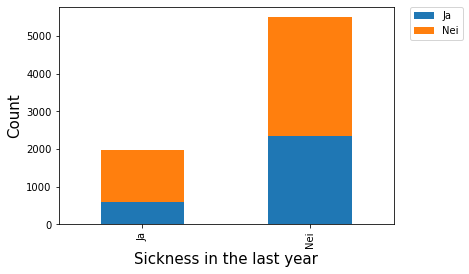

In [30]:
pd.crosstab(df.sykdom_siste_aar,df.jobb_etter_6mnd).plot(kind='bar', stacked=True)
plt.xlabel('Sickness in the last year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### <span style='color:midnightblue'> Feature Distribution: Job-seeker in the previous one year </span>

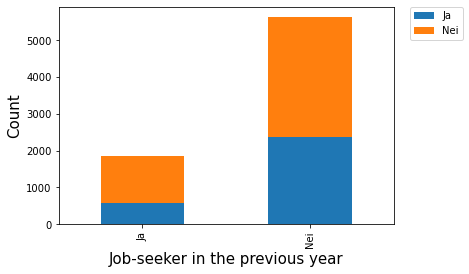

In [31]:
pd.crosstab(df.arbsoker_siste_aar,df.jobb_etter_6mnd).plot(kind='bar', stacked=True)
plt.xlabel('Job-seeker in the previous year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### <span style='color:midnightblue'> Feature Distribution: Worked in the last two months </span>

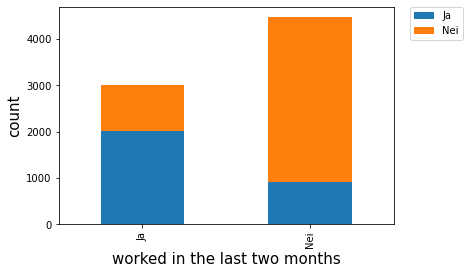

In [32]:
pd.crosstab(df.arbeid_siste_2mnd,df.jobb_etter_6mnd).plot(kind='bar', stacked=True)
plt.xlabel('worked in the last two months', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## <span style='color:midnightblue'> Create dummy or indicator variables for nominal data </span>

In [83]:
cat_vars=['fylke','yrke']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1
cat_vars=['fylke','yrke']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

### <span style='color:midnightblue'> Check the list of columns after addition of dummy variables </span>

In [84]:
data_final=df[to_keep]
data_final.columns.values

array(['utdanning', 'sykdom_siste_aar', 'arbsoker_siste_aar', 'forerkort',
       'arbeid_siste_2mnd', 'alder', 'kjonn', 'jobb_etter_6mnd',
       'fylke_Akershus', 'fylke_Aust-Agder', 'fylke_Buskerud',
       'fylke_Finnmark', 'fylke_Hedmark', 'fylke_Hordaland',
       'fylke_Møre og Romsdal', 'fylke_Nord-Trøndelag', 'fylke_Nordland',
       'fylke_Oppland', 'fylke_Oslo', 'fylke_Rogaland',
       'fylke_Sogn og Fjordane', 'fylke_Sør-Trøndelag', 'fylke_Telemark',
       'fylke_Troms', 'fylke_Vest-Agder', 'fylke_Vestfold',
       'fylke_Østfold', 'yrke_Akademiske yrker', 'yrke_Annet',
       'yrke_Bønder, fiskere, mv', 'yrke_Håndverkere',
       'yrke_Høgskoleyrker', 'yrke_Kontoryrker', 'yrke_Ledere',
       'yrke_Maskin og transportarbeidere',
       'yrke_Renholdere og hjelpepleiere', 'yrke_Salg, service og omsorg'],
      dtype=object)

### <span style='color:midnightblue'> Convert categorical data into numeric data </span>

In [85]:
target = {'Ja': 1,'Nei': 0}

target1 = {'Female': 1,'Male': 0}

target2 = {'Grunnskole': 0,'VGS ikke fullf': 1,'VGS fullf': 2,'Høyere utd u4 år': 3,'Høyere utd 4 år+': 4}

data_final = data_final.replace({'utdanning' : target2,'jobb_etter_6mnd' : target,'sykdom_siste_aar' : target,'arbsoker_siste_aar' : target,'forerkort' : target,'arbeid_siste_2mnd' : target,'kjonn' : target1})

In [86]:
data_final.head()

,utdanning,sykdom_siste_aar,arbsoker_siste_aar,forerkort,arbeid_siste_2mnd,alder,kjonn,jobb_etter_6mnd,fylke_Akershus,fylke_Aust-Agder,...,yrke_Akademiske yrker,yrke_Annet,"yrke_Bønder, fiskere, mv",yrke_Håndverkere,yrke_Høgskoleyrker,yrke_Kontoryrker,yrke_Ledere,yrke_Maskin og transportarbeidere,yrke_Renholdere og hjelpepleiere,"yrke_Salg, service og omsorg"
0,4,0,1,1,0,35,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,30,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,29,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,1,0,36,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3,1,0,1,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### <span style='color:midnightblue'> Shift target variable column to the end of the dataframe  </span>

In [87]:
temp_cols=data_final.columns.tolist()
new_cols=temp_cols[0:7] + temp_cols[8:37] + temp_cols[7:8]
data_final=data_final[new_cols]
data_final.head()

,utdanning,sykdom_siste_aar,arbsoker_siste_aar,forerkort,arbeid_siste_2mnd,alder,kjonn,fylke_Akershus,fylke_Aust-Agder,fylke_Buskerud,...,yrke_Annet,"yrke_Bønder, fiskere, mv",yrke_Håndverkere,yrke_Høgskoleyrker,yrke_Kontoryrker,yrke_Ledere,yrke_Maskin og transportarbeidere,yrke_Renholdere og hjelpepleiere,"yrke_Salg, service og omsorg",jobb_etter_6mnd
0,4,0,1,1,0,35,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,30,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,29,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,1,1,0,36,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3,1,0,1,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [88]:
data_final.columns

Index(['utdanning', 'sykdom_siste_aar', 'arbsoker_siste_aar', 'forerkort',
       'arbeid_siste_2mnd', 'alder', 'kjonn', 'fylke_Akershus',
       'fylke_Aust-Agder', 'fylke_Buskerud', 'fylke_Finnmark', 'fylke_Hedmark',
       'fylke_Hordaland', 'fylke_Møre og Romsdal', 'fylke_Nord-Trøndelag',
       'fylke_Nordland', 'fylke_Oppland', 'fylke_Oslo', 'fylke_Rogaland',
       'fylke_Sogn og Fjordane', 'fylke_Sør-Trøndelag', 'fylke_Telemark',
       'fylke_Troms', 'fylke_Vest-Agder', 'fylke_Vestfold', 'fylke_Østfold',
       'yrke_Akademiske yrker', 'yrke_Annet', 'yrke_Bønder, fiskere, mv',
       'yrke_Håndverkere', 'yrke_Høgskoleyrker', 'yrke_Kontoryrker',
       'yrke_Ledere', 'yrke_Maskin og transportarbeidere',
       'yrke_Renholdere og hjelpepleiere', 'yrke_Salg, service og omsorg',
       'jobb_etter_6mnd'],
      dtype='object')

## <span style='color:midnightblue'> Spearman rank correlation matrix </span>

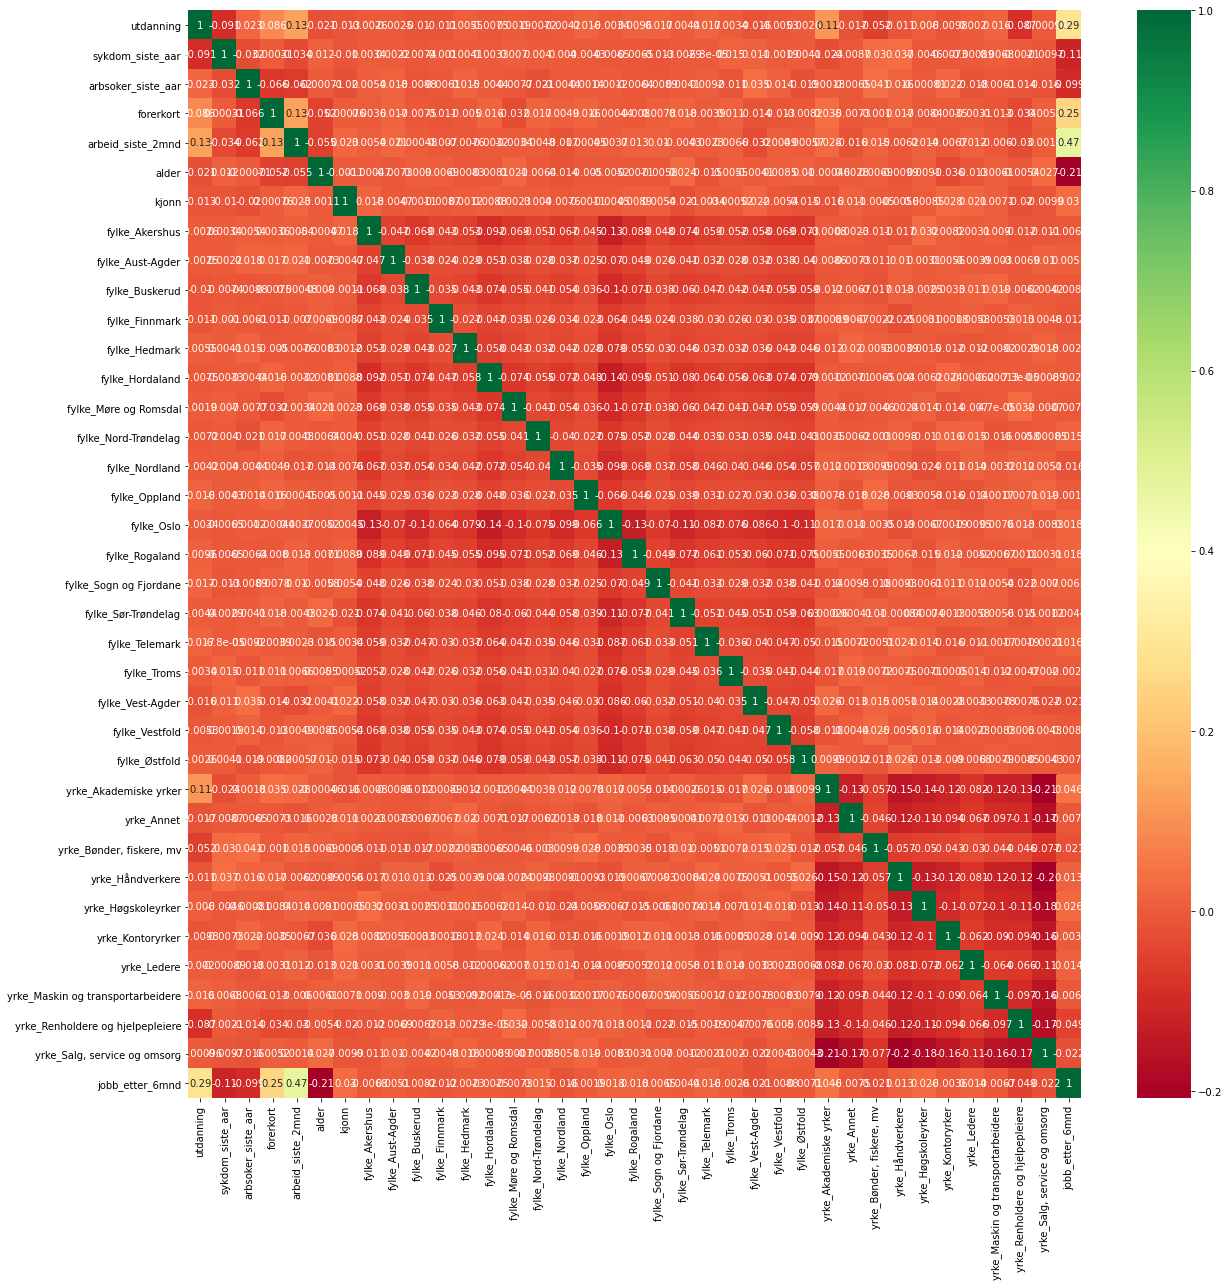

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
#get correlations of each features in dataset
corrmat = data_final.corr(method="spearman")
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data_final[top_corr_features].corr(method="spearman"),annot=True,cmap="RdYlGn")

[Text(0, 0.5, 'yrke_Akademiske yrker'),
 Text(0, 1.5, 'yrke_Annet'),
 Text(0, 2.5, 'yrke_Bønder, fiskere, mv'),
 Text(0, 3.5, 'yrke_Håndverkere'),
 Text(0, 4.5, 'yrke_Høgskoleyrker'),
 Text(0, 5.5, 'yrke_Kontoryrker'),
 Text(0, 6.5, 'yrke_Ledere'),
 Text(0, 7.5, 'yrke_Maskin og transportarbeidere'),
 Text(0, 8.5, 'yrke_Renholdere og hjelpepleiere'),
 Text(0, 9.5, 'yrke_Salg, service og omsorg'),
 Text(0, 10.5, 'jobb_etter_6mnd')]

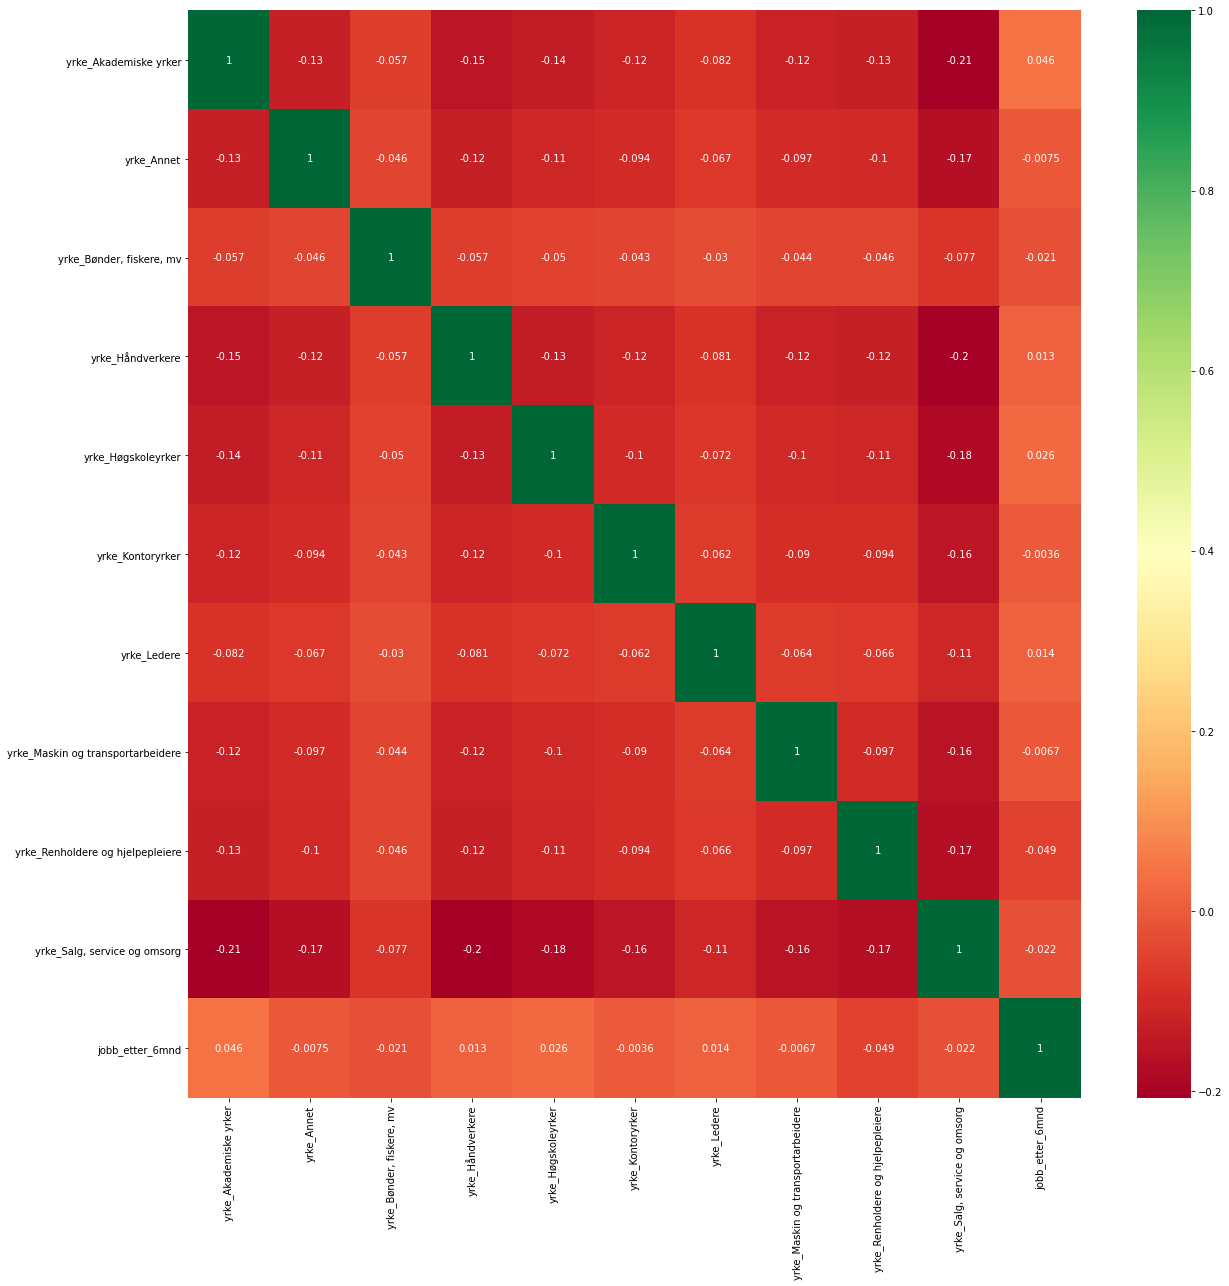

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
#get correlations of each features in dataset
corrmat = data_final.corr(method="spearman")
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data_final[top_corr_features[26:38]].corr(method="spearman"),annot=True,cmap="RdYlGn")
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')

[Text(0, 0.5, 'utdanning'),
 Text(0, 1.5, 'sykdom_siste_aar'),
 Text(0, 2.5, 'arbsoker_siste_aar'),
 Text(0, 3.5, 'forerkort'),
 Text(0, 4.5, 'arbeid_siste_2mnd'),
 Text(0, 5.5, 'alder'),
 Text(0, 6.5, 'kjonn'),
 Text(0, 7.5, 'fylke_Akershus')]

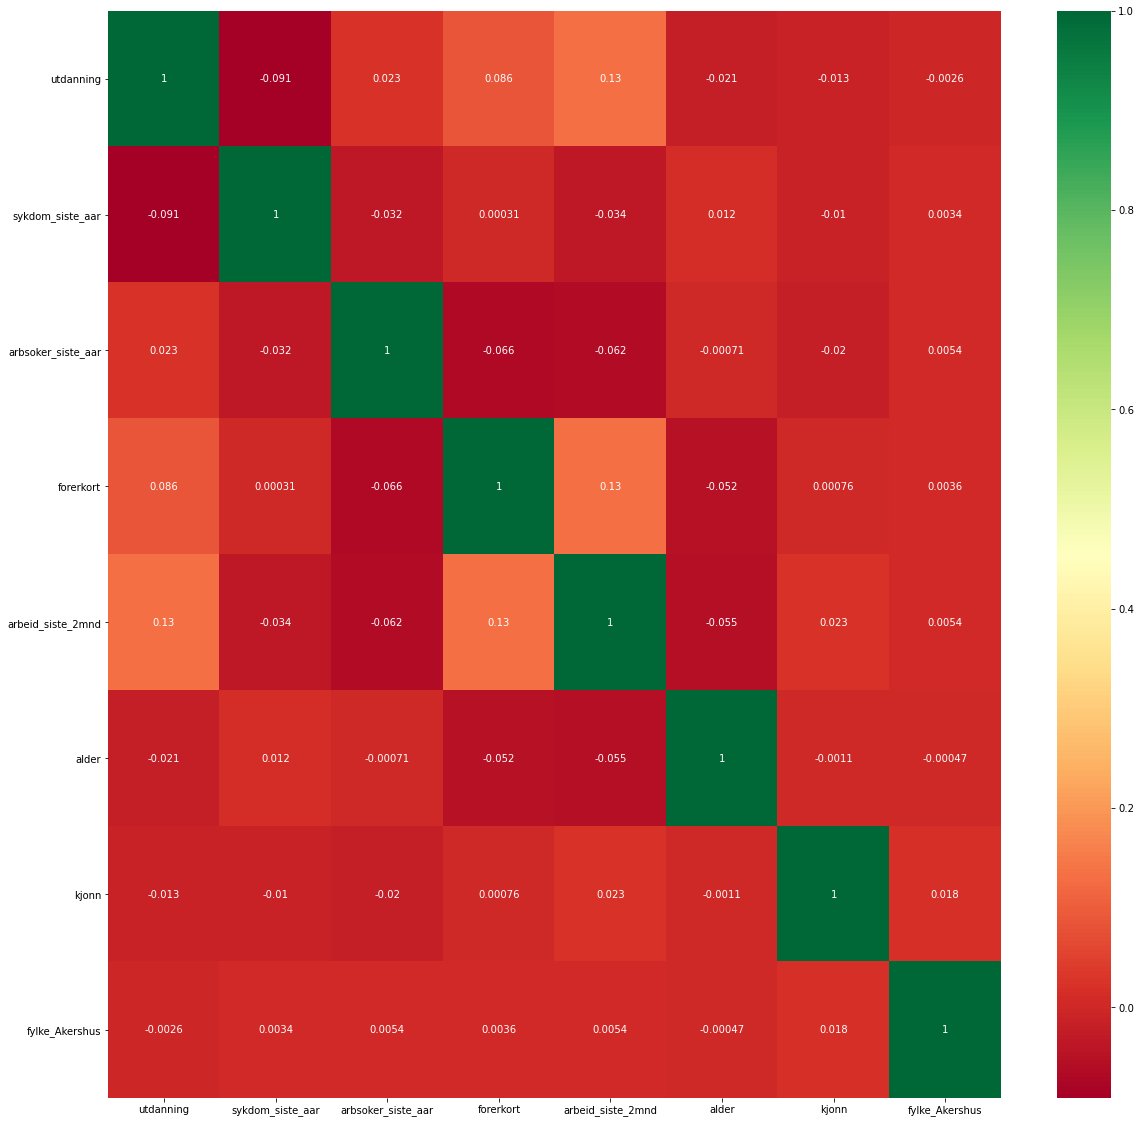

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
#get correlations of each features in dataset
corrmat = data_final.corr(method="spearman")
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data_final[top_corr_features[0:8]].corr(method="spearman"),annot=True,cmap="RdYlGn")
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')

# <span style='color:midnightblue'> Implementation of classification algorithms</span>

In [89]:
X = data_final.loc[:, data_final.columns != 'jobb_etter_6mnd']
y = data_final.loc[:, data_final.columns == 'jobb_etter_6mnd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## <span style='color:midnightblue'> 1. Decision Tree </span>

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtc = DecisionTreeClassifier(criterion = 'gini', random_state = 42).fit(X_train, y_train.values.ravel())
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtc.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.72


### <span style='color:midnightblue'> Decision Tree Visualization </span>

In [ ]:
from sklearn import tree
tree.plot_tree(dtc)

### <span style='color:midnightblue'> Finding optimal max_depth </span>

Text(0, 0.5, 'Accuracy')

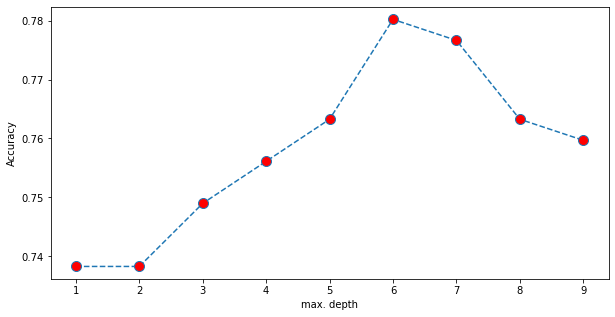

In [91]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 10))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    dtc1 = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    dtc1.fit(X_train, y_train)
    score = dtc1.score(X_test, y_test)
    accuracy.append(score)
plt.figure(figsize = (10,5))
plt.plot(max_depth_range ,accuracy,linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.xlabel('max. depth')
plt.ylabel('Accuracy')
#plt.legend()

In [50]:
dtc1 = DecisionTreeClassifier(max_depth = 6)
                       
dtc1.fit(X_train, y_train)
dtc1.get_depth()

6

In [51]:
dtc1.get_n_leaves()

63

In [52]:
from sklearn.metrics import classification_report
y_pred_dtc = dtc1.predict(X_test)
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1362
           1       0.75      0.67      0.70       881

    accuracy                           0.78      2243
   macro avg       0.77      0.76      0.76      2243
weighted avg       0.78      0.78      0.78      2243



In [92]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_dtc)
# Assigning columns name
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,1161,201
Actual Positive,293,588


In [93]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    '''
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    '''
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TP / float(TP + FP))
    
    # calculate recall
    conf_recall = (TP / float(TP + FN))
    
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'Recall: {round(conf_recall,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
    
confusion_metrics (cm)

--------------------------------------------------
Accuracy: 0.78
Mis-Classification: 0.22
Sensitivity: 0.67
Specificity: 0.85
Precision: 0.75
Recall: 0.67
f_1 Score: 0.7


In [94]:
feature_importance=pd.DataFrame({
    'rfc':rfc.feature_importances_,
    'dtc1':dtc.feature_importances_
},index=data_final.drop(columns=['jobb_etter_6mnd']).columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)
#d = feature_importance[0:12]

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(11,11))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dtc1'],0.4, color='orange',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Feature importance')
plt.ylabel('Feature Name')
ax.legend()
#plt.show()

NameError: name 'rfc' is not defined

In [ ]:
feature_importance=pd.DataFrame({
    'rfc':rfc.feature_importances_,
    'dtc':dtc.feature_importances_
},index=data_final.drop(columns=['jobb_etter_6mnd']).columns)
feature_importance.sort_values(by='rfc',ascending=False,inplace=True)
d = feature_importance[0:12]

index = np.arange(len(d))
fig, ax = plt.subplots(figsize=(10,10))
rfc_feature=ax.bar(index,d['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.bar(index+0.4,d['dtc'],0.4,color='orange',label='Decision Tree')
ax.set(xticks=index+0.4,xticklabels=d.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Top 10 Features')
plt.ylabel('Feature importance')
ax.legend()
#plt.show()

In [ ]:
feature_importance.index[]

In [96]:
# evaluation of a model using 5 features chosen with random forest importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(DecisionTreeClassifier(), max_features=5)
    # learn relationship from training data
    fs.fit(X_train, y_train.values.ravel())
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# define the dataset
X = data_final.loc[:, data_final.columns != 'jobb_etter_6mnd']
y = data_final.loc[:, data_final.columns == 'jobb_etter_6mnd']
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = DecisionTreeClassifier(max_depth = 6)
model1 = KNeighborsClassifier()
model.fit(X_train_fs, y_train.values.ravel())
model1.fit(X_train_fs, y_train.values.ravel())
# evaluate the model
yhat = model.predict(X_test_fs)
yhat1 = model1.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
accuracy1 = accuracy_score(y_test, yhat1)
print('Accuracy with Decision Tree: %.2f' % (accuracy*100))
print('Accuracy with KNN: %.2f' % (accuracy1*100))

Accuracy with Decision Tree: 77.98
Accuracy with KNN: 73.65


In [98]:
from sklearn.metrics import classification_report
y_pred_dtc = model.predict(X_test_fs)
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1362
           1       0.75      0.67      0.70       881

    accuracy                           0.78      2243
   macro avg       0.77      0.76      0.76      2243
weighted avg       0.78      0.78      0.78      2243



In [99]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
cm_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)
# Assigning columns name
cm_df = pd.DataFrame(cm_dtc, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,1161,201
Actual Positive,293,588


In [57]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    '''
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    '''
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TP / float(TP + FP))
    
    # calculate recall
    conf_recall = (TP / float(TP + FN))
    
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'Recall: {round(conf_recall,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
    
confusion_metrics (cm_dtc)

--------------------------------------------------
Accuracy: 0.78
Mis-Classification: 0.22
Sensitivity: 0.67
Specificity: 0.85
Precision: 0.75
Recall: 0.67
f_1 Score: 0.7


In [ ]:
import pandas as pd
feature_imp = pd.Series(rfc.feature_importances_,index=data_final.columns[:36]).sort_values(ascending=False)
feature_imp

In [ ]:
import pandas as pd
feature_imp = pd.Series(dtc.feature_importances_,index=data_final.columns[:36]).sort_values(ascending=False)
feature_imp

In [ ]:
y_pred2 = clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred2)
# Assigning columns name
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

## <span style='color:midnightblue'> 2. Random Forest </span>

In [101]:
X = data_final.loc[:, data_final.columns != 'jobb_etter_6mnd']
y = data_final.loc[:, data_final.columns == 'jobb_etter_6mnd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42).fit(X_train, y_train.values.ravel())
print('Accuracy of Random Tree classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random Tree classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Accuracy of Random Tree classifier on training set: 1.00
Accuracy of Random Tree classifier on test set: 0.76


In [103]:
from sklearn.metrics import classification_report
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1362
           1       0.71      0.66      0.69       881

    accuracy                           0.76      2243
   macro avg       0.75      0.74      0.75      2243
weighted avg       0.76      0.76      0.76      2243



### <span style='color:midnightblue'> Confusion Matrix for Random Forest </span>

In [104]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
cm_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
# Assigning columns name
cm_df = pd.DataFrame(cm_rfc, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,1130,232
Actual Positive,301,580


In [105]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    '''
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    '''
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TP / float(TP + FP))
    
    # calculate recall
    conf_recall = (TP / float(TP + FN))
    
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'Recall: {round(conf_recall,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
    
confusion_metrics (cm_rfc)

--------------------------------------------------
Accuracy: 0.76
Mis-Classification: 0.24
Sensitivity: 0.66
Specificity: 0.83
Precision: 0.71
Recall: 0.66
f_1 Score: 0.69


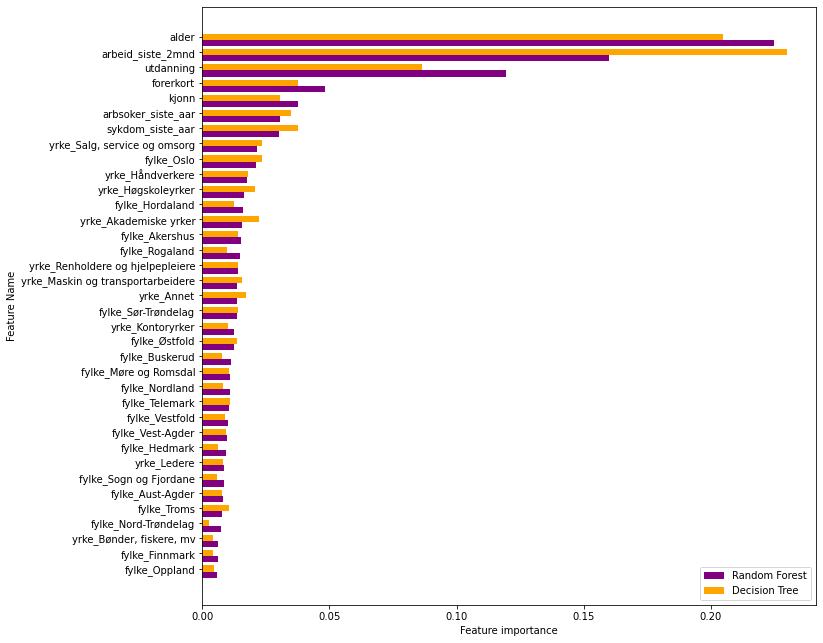

In [107]:
import numpy as np
feature_importance=pd.DataFrame({
    'rfc':rfc.feature_importances_,
    'dtc1':dtc.feature_importances_
},index=data_final.drop(columns=['jobb_etter_6mnd']).columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)
#d = feature_importance[0:12]

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(11,11))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dtc1'],0.4, color='orange',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Feature importance')
plt.ylabel('Feature Name')
ax.legend()
#plt.show()

## <span style='color:midnightblue'> 3. K-Nearest Neighbors </span>

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train.values.ravel())))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test.values.ravel())))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.71


In [109]:
from sklearn.metrics import classification_report
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1362
           1       0.65      0.57      0.61       881

    accuracy                           0.71      2243
   macro avg       0.70      0.69      0.69      2243
weighted avg       0.71      0.71      0.71      2243



In [110]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_knn)
# Assigning columns name
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,1090,272
Actual Positive,377,504


In [111]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    '''
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    '''
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TP / float(TP + FP))
    
    # calculate recall
    conf_recall = (TP / float(TP + FN))
    
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'Recall: {round(conf_recall,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
    
confusion_metrics (cm)

--------------------------------------------------
Accuracy: 0.71
Mis-Classification: 0.29
Sensitivity: 0.57
Specificity: 0.8
Precision: 0.65
Recall: 0.57
f_1 Score: 0.61


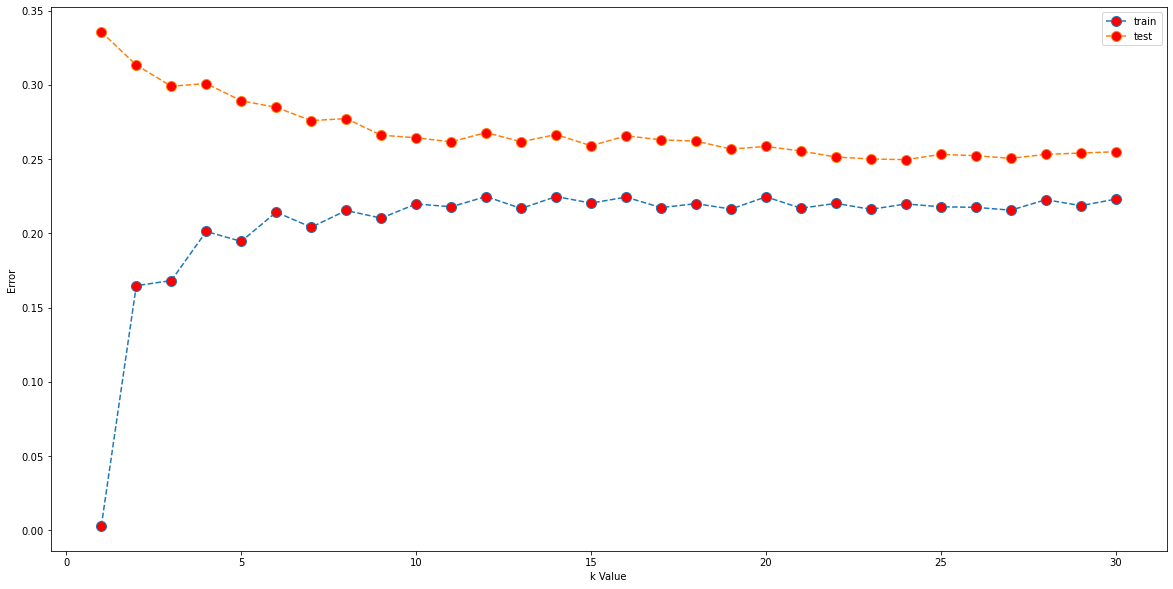

In [112]:
error1= []
error2= []
for k in range(1,31):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    y_pred1 = knn.predict(X_train)
    y_train1= y_train.to_numpy()
    y_train1 = y_train1.reshape(5231,1)
    error1.append(1-knn.score(X_train, y_train))
    y_test1 = y_test.to_numpy()
    y_test1 = y_test1.reshape(2243,1)
    y_pred2= knn.predict(X_test)
    #error2.append(np.mean(y_test1!= y_pred2))
    error2.append(1-knn.score(X_test, y_test.values.ravel()))
plt.figure(figsize = (20,10))
plt.plot(range(1,31),error1,linestyle='dashed', marker='o',markerfacecolor='red', markersize=10, label="train")
plt.plot(range(1,31),error2,linestyle='dashed', marker='o',markerfacecolor='red', markersize=10, label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [113]:
print("Minimum error:-",min(error2),"at K =",error2.index(min(error2)))

Minimum error:- 0.24966562639322332 at K = 23


In [ ]:
k_range = range(1, 31)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train.values.ravel())
    scores.append(knn.score(X_test, y_test.values.ravel()))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0, 5, 10, 15, 20, 25, 30])

In [ ]:
dexamf = pd.DataFrame(data=X_train, columns=data_final.columns[:36])
dexamf.head()

In [ ]:
X = data_final.loc[:, data_final.columns != 'jobb_etter_6mnd']
y = data_final.loc[:, data_final.columns == 'jobb_etter_6mnd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test.values.ravel())))

In [ ]:
from sklearn.metrics import classification_report
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_knn)
# Assigning columns name
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

In [ ]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    '''
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    '''
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TP / float(TP + FP))
    
    # calculate recall
    conf_recall = (TP / float(TP + FN))
    
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'Recall: {round(conf_recall,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
    
confusion_metrics (cm)

In [ ]:
error1= []
error2= []
for k in range(1,31):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    y_pred1 = knn.predict(X_train)
    y_train1= y_train.to_numpy()
    y_train1 = y_train1.reshape(5231,1)
    error1.append(1-knn.score(X_train, y_train))
    y_test1 = y_test.to_numpy()
    y_test1 = y_test1.reshape(2243,1)
    y_pred2= knn.predict(X_test)
    #error2.append(np.mean(y_test1!= y_pred2))
    error2.append(1-knn.score(X_test, y_test.values.ravel()))
plt.figure(figsize = (20,10))
plt.plot(range(1,31),error1,linestyle='dashed', marker='o',markerfacecolor='red', markersize=10, label="train")
plt.plot(range(1,31),error2,linestyle='dashed', marker='o',markerfacecolor='red', markersize=10, label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train, y_train.values.ravel())
print('Accuracy of K-NN classifier on training set: {:.4f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.4f}'
     .format(knn.score(X_test, y_test.values.ravel())))

In [ ]:
print("Minimum error:-",min(error2),"at K =",error2.index(min(error2)))

## <span style='color:midnightblue'> Testing with other classification algorithms </span>

### <span style='color:midnightblue'> 1. Linear Discriminant Analysis </span>

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train.values.ravel())
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

### <span style='color:midnightblue'> 2. Gaussian Naive Bayes </span>

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

### <span style='color:midnightblue'> 3. Support Vector Machine </span>

In [ ]:
from sklearn.svm import SVC
svm1 = SVC(kernel = 'rbf',gamma='scale')
svm1.fit(X_train, y_train.values.ravel())
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm1.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm1.score(X_test, y_test)))

### <span style='color:midnightblue'> 4. Kernel Support Vector Machine </span>

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train.values.ravel())
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

### <span style='color:midnightblue'> 5. Logistic Regression </span>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

#### <span style='color:midnightblue'> Confusion matrix </span>

In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
# Assigning columns name
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

In [ ]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    '''
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    '''
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
    
confusion_metrics (cm)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

From the below, the estimated average accuracy value of the logistic model is 76.9% ± 1.4, and the area under the receiver operating characteristic curve (ROC_AUC) has an estimated average value of 83.4 ± 1.56 while controlling for the imbalance characteristics of the classification.

In [ ]:
import pandas as pd
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
steps = [('over', SMOTE()), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
for scoring in["accuracy", "roc_auc"]:
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
    scores = cross_val_score(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)
    print("Model", scoring, " mean=", scores.mean() , "stddev=", scores.std())

In [ ]:
import pandas as pd
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
steps = [('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
for scoring in["accuracy", "roc_auc"]:
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
    scores = cross_val_score(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)
    print("Model", scoring, " mean=", scores.mean() , "stddev=", scores.std())

#### <span style='color:midnightblue'> ROC curve </span> 

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC-AUC = %0.2f' % logit_roc_auc)
# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)

In [ ]:
y_pred_prob = y_pred_prob[:, 1]

In [ ]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_prob)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)

In [ ]:
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

#### <span style='color:midnightblue'> Precision vs. Recall Curve </span> 

In [ ]:
# plot the precision-recall curves
plt.plot(lr_recall, lr_precision, marker='.')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
# show the plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = svm1.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
import mlxtend
from mlxtend.plotting import plot_decision_regions

def knn_comparison(k):
    x = X_test
    y = y_train.astype(int).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
# Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
    plt.xlabel('x')
    plt.ylabel('y')
 #plt.title('Knn with K=''+ str(k))
    plt.show()

for i in [1, 5,20,30,40,60]:
    knn_comparison(i)